Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [14]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from renamevars import renamevars
from scat_plt import scat_plt 
from normalize import normalize
#from dataframe_editor import dataframe_editor
from group_and_average import group_and_average 

In [2]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [3]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### 1. Cleaning and tidying the dataset

First we should look at the correlation between different groups of variables: fundamental ferquency, Jitter and Shimmer. Using the **scat_plot** function and showing the correlation value we can determine which ones we can just remove.

In [4]:
#Separation in different groups to analyze

fundamental_freq_vars = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
jitter_vars = ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
shimmer_vars = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']

#### Fundamental Frequency

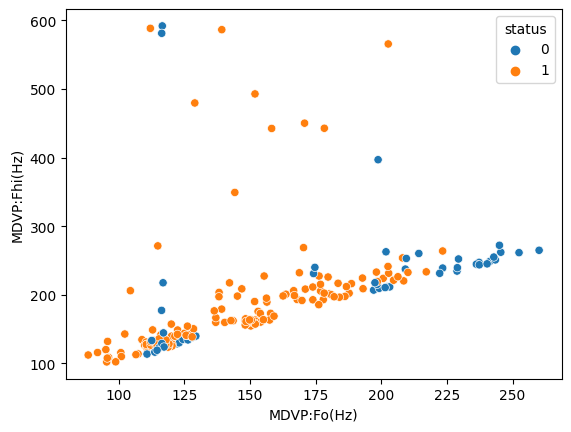

Correlation between MDVP:Fo(Hz) and MDVP:Fhi(Hz): 0.4009846762460626


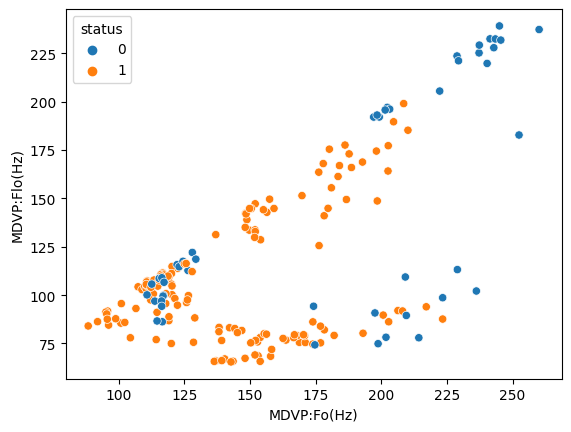

Correlation between MDVP:Fo(Hz) and MDVP:Flo(Hz): 0.5965455187557578


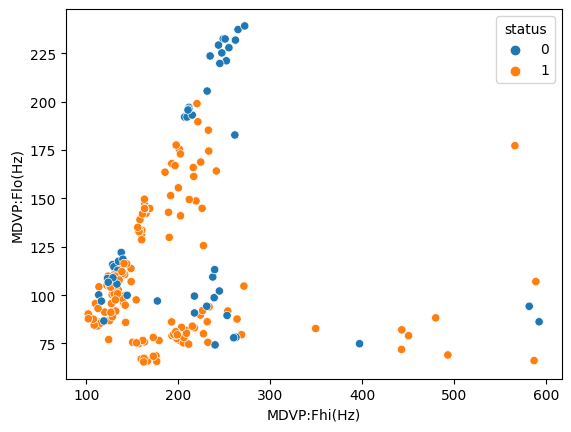

Correlation between MDVP:Fhi(Hz) and MDVP:Flo(Hz): 0.0849512508257375


In [5]:
vars_list=fundamental_freq_vars
for i in range(len(vars_list)):
        for j in range(i+1, len(vars_list)):
            var1, var2 = vars_list[i], vars_list[j]
            scat_plt(df[var1], df[var2], groups=df['status']) 
            correlation = df[var1].corr(df[var2])
            print(f'Correlation between {var1} and {var2}: {correlation}')

#### Jitter

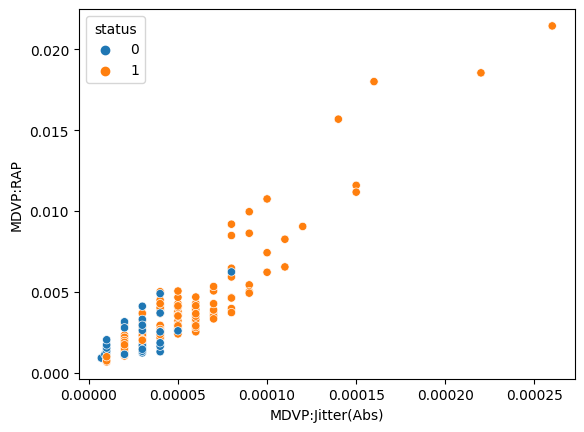

Correlation between MDVP:Jitter(Abs) and MDVP:RAP: 0.9229109688984645


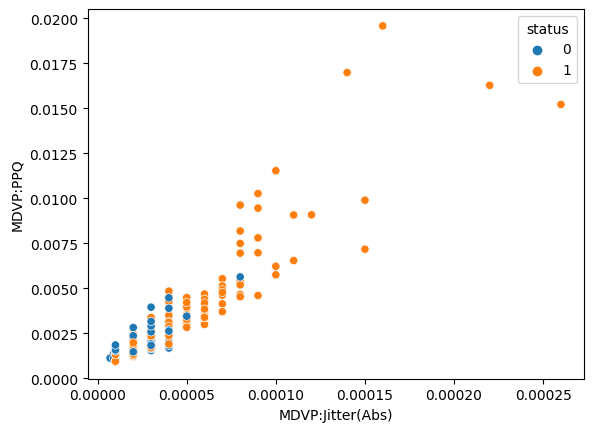

Correlation between MDVP:Jitter(Abs) and MDVP:PPQ: 0.8977779044154581


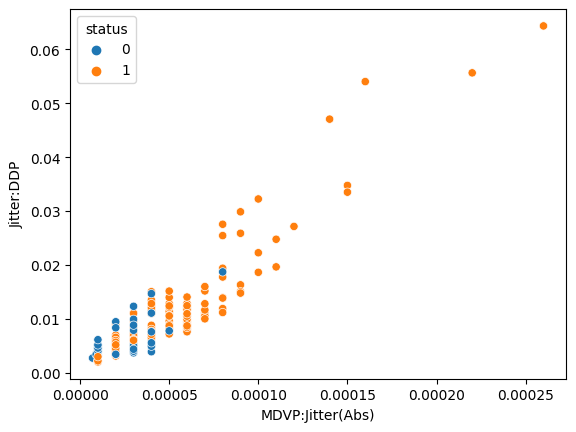

Correlation between MDVP:Jitter(Abs) and Jitter:DDP: 0.9229130329829802


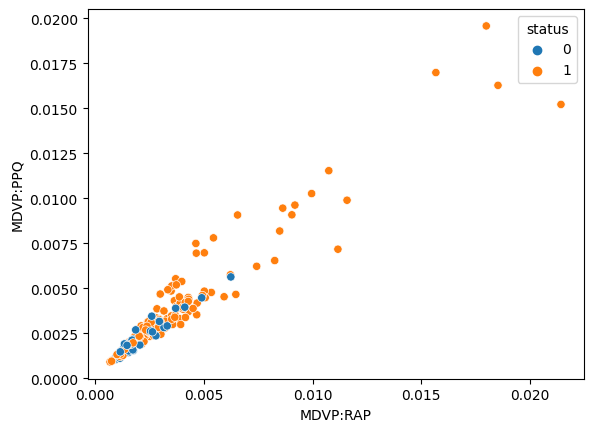

Correlation between MDVP:RAP and MDVP:PPQ: 0.9573168930480008


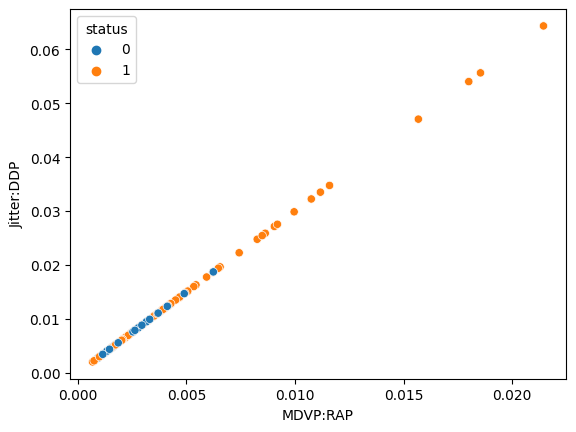

Correlation between MDVP:RAP and Jitter:DDP: 0.999999600104134


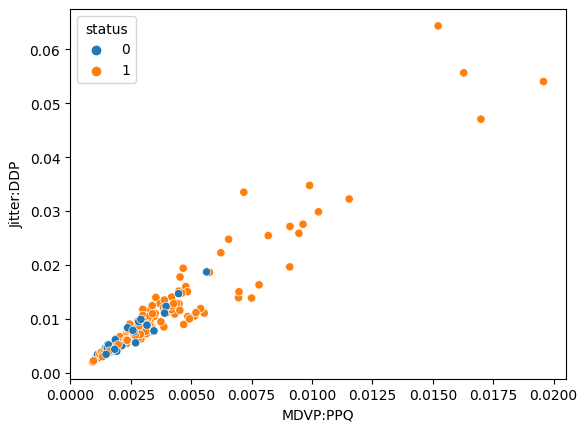

Correlation between MDVP:PPQ and Jitter:DDP: 0.9573191582070276


In [6]:
vars_list=jitter_vars
for i in range(len(vars_list)):
        for j in range(i+1, len(vars_list)):
            var1, var2 = vars_list[i], vars_list[j]
            scat_plt(df[var1], df[var2], groups=df['status']) 
            correlation = df[var1].corr(df[var2])
            print(f'Correlation between {var1} and {var2}: {correlation}')

#### Shimmer

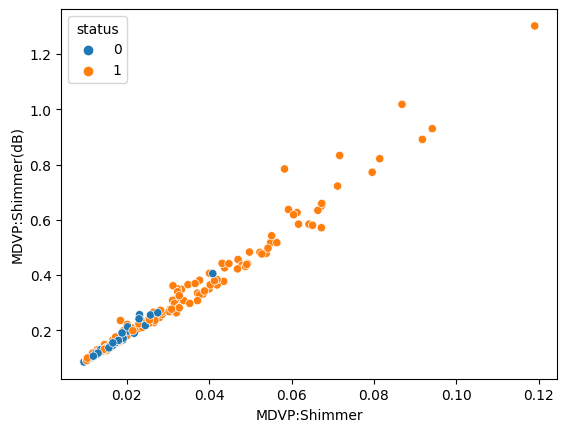

Correlation between MDVP:Shimmer and MDVP:Shimmer(dB): 0.9872578145507641


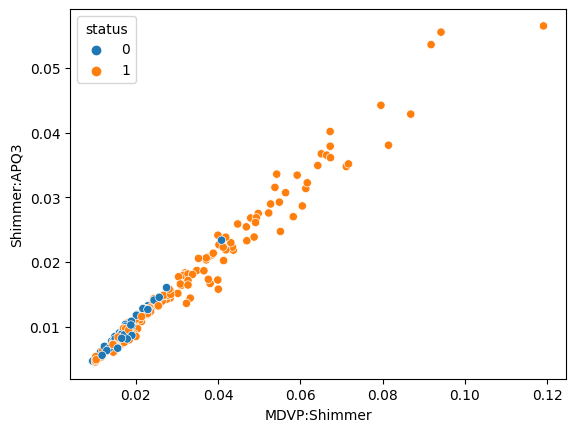

Correlation between MDVP:Shimmer and Shimmer:APQ3: 0.9876250519099833


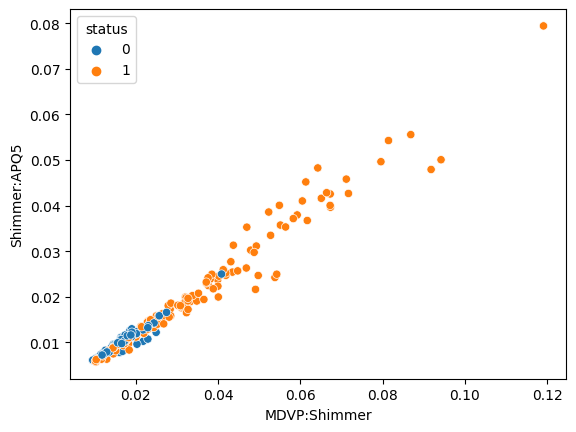

Correlation between MDVP:Shimmer and Shimmer:APQ5: 0.9828354477070598


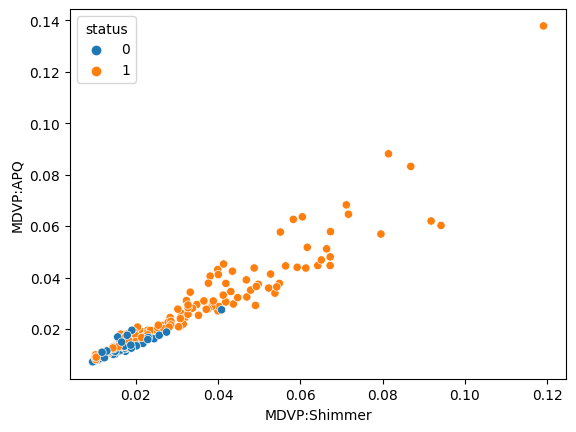

Correlation between MDVP:Shimmer and MDVP:APQ: 0.9500828933606196


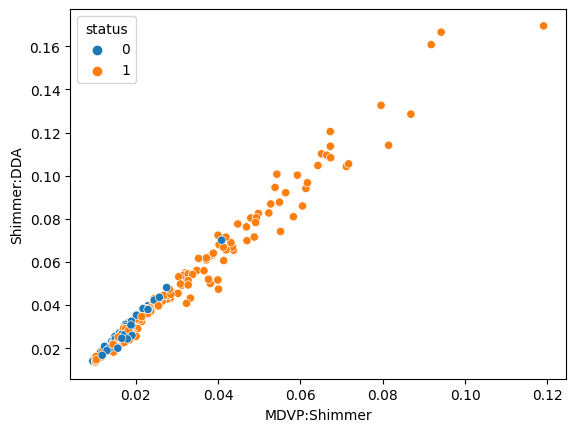

Correlation between MDVP:Shimmer and Shimmer:DDA: 0.9876256527301994


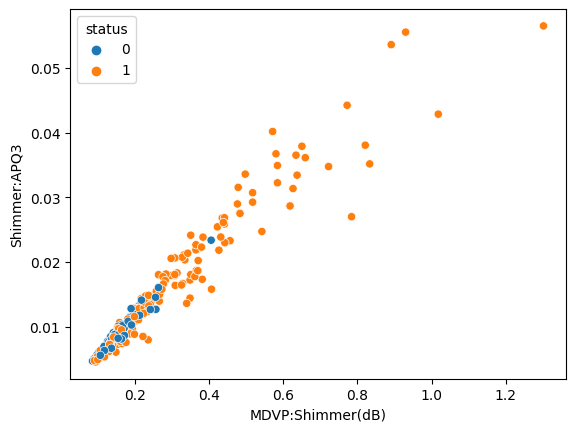

Correlation between MDVP:Shimmer(dB) and Shimmer:APQ3: 0.9631980852351482


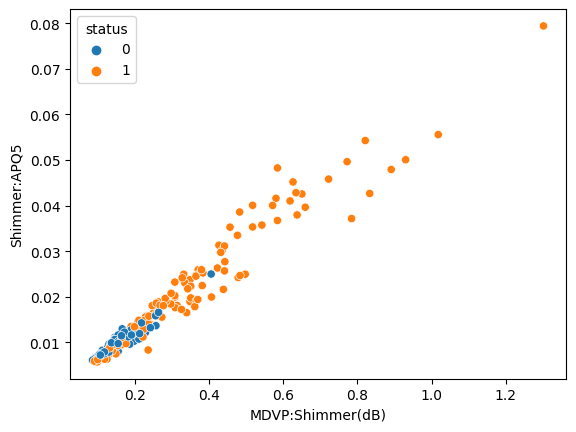

Correlation between MDVP:Shimmer(dB) and Shimmer:APQ5: 0.9737505606234652


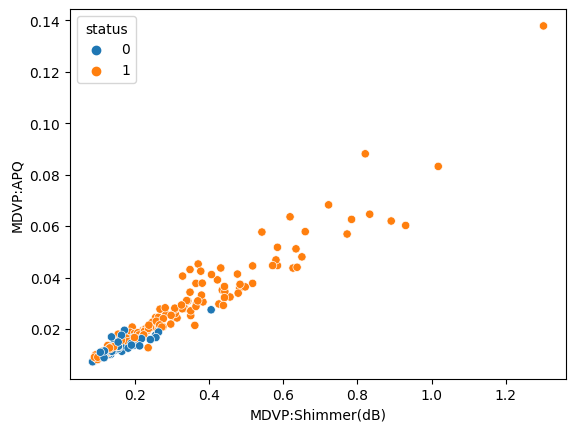

Correlation between MDVP:Shimmer(dB) and MDVP:APQ: 0.9609767232961031


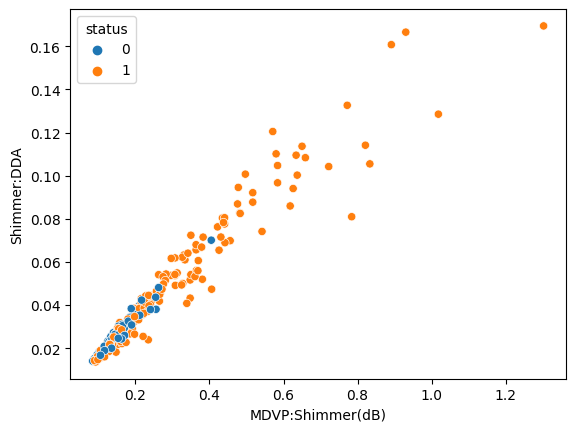

Correlation between MDVP:Shimmer(dB) and Shimmer:DDA: 0.9632017037204209


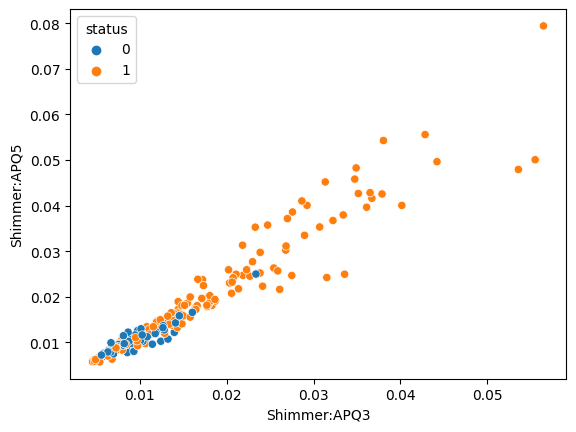

Correlation between Shimmer:APQ3 and Shimmer:APQ5: 0.9600697638028982


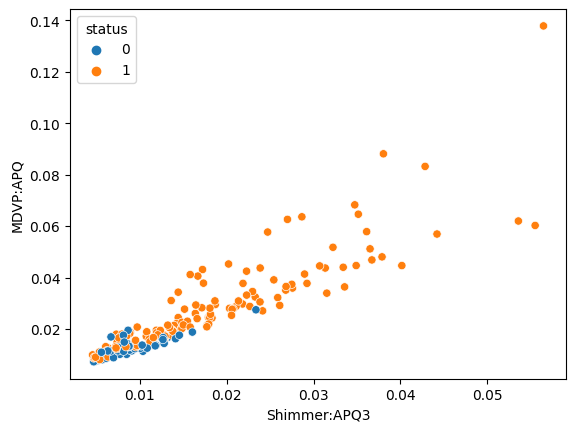

Correlation between Shimmer:APQ3 and MDVP:APQ: 0.896644519268466


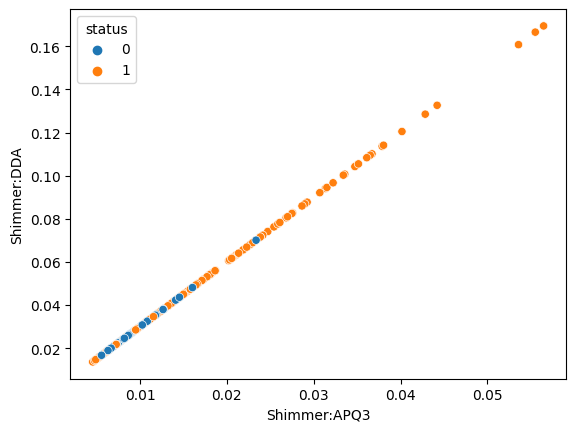

Correlation between Shimmer:APQ3 and Shimmer:DDA: 0.9999999636932831


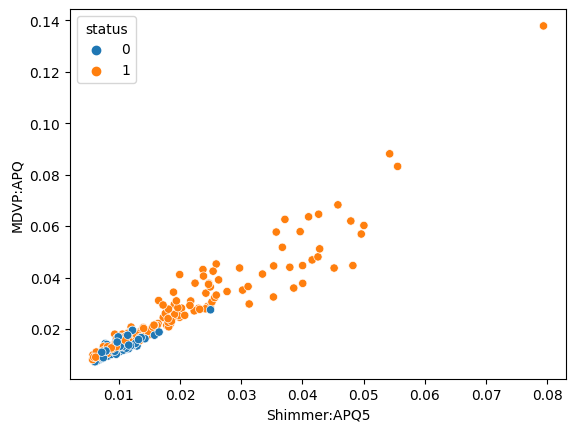

Correlation between Shimmer:APQ5 and MDVP:APQ: 0.9491461105717148


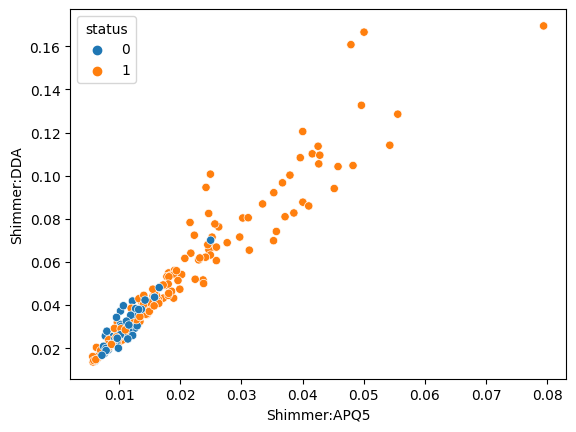

Correlation between Shimmer:APQ5 and Shimmer:DDA: 0.9600715928435882


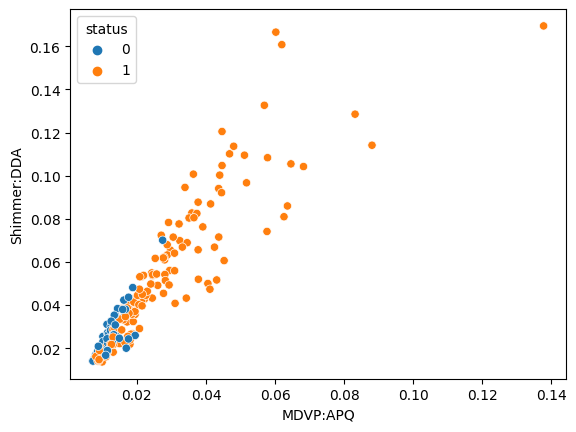

Correlation between MDVP:APQ and Shimmer:DDA: 0.8966467659005809


In [7]:
vars_list=shimmer_vars
for i in range(len(vars_list)):
        for j in range(i+1, len(vars_list)):
            var1, var2 = vars_list[i], vars_list[j]
            scat_plt(df[var1], df[var2], groups=df['status']) 
            correlation = df[var1].corr(df[var2])
            print(f'Correlation between {var1} and {var2}: {correlation}')

To create the new **cleared_df** dataframe we select some of them that have less correlation between them. In the cases of jitter and shimmer they all are very correlated so takng or or two variables will be enough.The new dataframe will have the following variables:

In [21]:
cleaned_df= df[['name', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(Abs)', 'MDVP:PPQ',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]
cleaned_df.head(5)

,name,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,157.302,74.997,0.00007,0.00554,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,148.650,113.819,0.00008,0.00696,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,131.111,111.555,0.00009,0.00781,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,137.871,111.366,0.00009,0.00698,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,141.781,110.655,0.00011,0.00908,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [22]:
# Changing the names of the cleaned_df
dict_names = {'MDVP:Fo(Hz)':'avFF',
              'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'Shimmer:DDA':'dda'}

cleaned_df = renamevars(cleaned_df, dict_names)
cleaned_df.columns

Index(['name', 'maxFF', 'minFF', 'absJitter', 'ppq', 'apq', 'dda', 'NHR',
       'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### 2. Basic EDA based on plots and descriptive statistics

Number of Observations: 195
STATS BY GROUP(STATUS=0 OR STATUS=1)
             maxFF       minFF   absJitter         ppq         apq         dda  \
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000   
mean   197.104918  116.324631    0.000044    0.003446    0.024081    0.046993   
std     91.491548   43.521413    0.000035    0.002759    0.016947    0.030459   
min    102.145000   65.476000    0.000007    0.000920    0.007190    0.013640   
25%    134.862500   84.291000    0.000020    0.001860    0.013080    0.024735   
50%    175.829000  104.315000    0.000030    0.002690    0.018260    0.038360   
75%    224.205500  140.018500    0.000060    0.003955    0.029400    0.060795   
max    592.030000  239.170000    0.000260    0.019580    0.137780    0.169420   

              NHR         HNR        RPDE         DFA     spread1     spread2  \
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000   
mean     0.024847   21.885974    0.498536 

<Figure size 800x600 with 0 Axes>

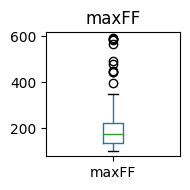

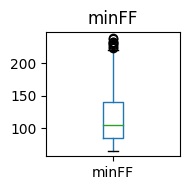

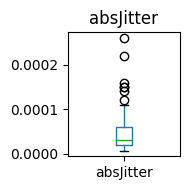

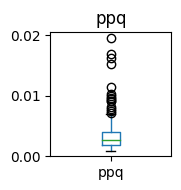

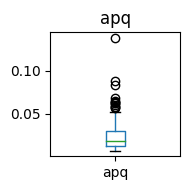

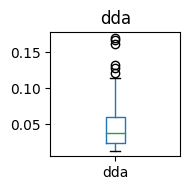

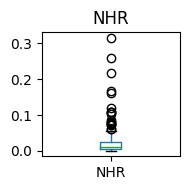

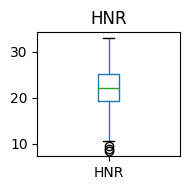

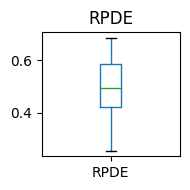

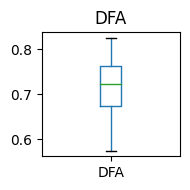

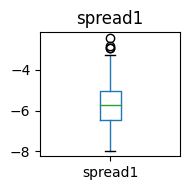

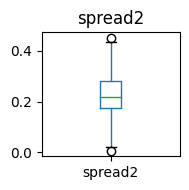

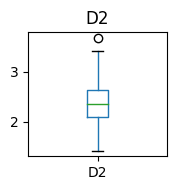

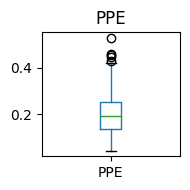

<Figure size 640x480 with 0 Axes>

In [10]:
#Compute the number of observation
num_observations = len(cleaned_df)
print(f"Number of Observations: {num_observations}")

general_stats = cleaned_df.describe()
print("STATS BY GROUP(STATUS=0 OR STATUS=1)\n", general_stats)

stats_by_group = cleaned_df.groupby('status', observed=True).describe()
print("GENERAL STATS\n", stats_by_group)

# These columns should be excluded when we create the boxplot, because their values are not integer
columns_to_exclude = ['subject_id', 'trial', 'status', 'name']  

plt.figure(figsize=(8, 6))

for column in cleaned_df.columns:
    if column not in columns_to_exclude:
        # Create the boxplot, except for those columns that appear on "columns_to_exclude"
        plt.figure(figsize=(2, 2))  # Adjust figure size if needed
        cleaned_df.boxplot(column=column)        
        plt.title(f'{column}')
        plt.grid(False)
        plt.tight_layout()
        plt.show()
# Adjust the size of the figure
plt.tight_layout()
plt.show()

### 3. Aggregating and transforming variables in the dataset

In [23]:
cleaned_df['status'] = pd.to_numeric(cleaned_df['status'], errors='coerce')
aux = cleaned_df.name.str.split('_',expand=True)
aux.columns = ['phon','R','subject_id','trial']
cleaned_df['subject_id'] = aux.subject_id
cleaned_df['trial'] = aux.trial
cleaned_df.drop(cleaned_df.columns[[0]], axis=1, inplace=True)
new_df=cleaned_df
new_df.head(5)

,maxFF,minFF,absJitter,ppq,apq,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,subject_id,trial
0,157.302,74.997,0.00007,0.00554,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,S01,1
1,148.650,113.819,0.00008,0.00696,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,S01,2
2,131.111,111.555,0.00009,0.00781,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,S01,3
3,137.871,111.366,0.00009,0.00698,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,S01,4
4,141.781,110.655,0.00011,0.00908,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,S01,5


In [24]:
transformed_df=new_df

In [25]:
gv="subject_id"
averaged_df=group_and_average(transformed_df, gv)
averaged_df

,subject_id,maxFF,minFF,absJitter,ppq,apq,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,141.312833,106.029833,0.000087,0.007312,0.037348,0.084073,0.016318,20.406667,1.0,0.428488,0.821314,-4.239926,0.296836,2.342642,0.353841
1,S02,121.894333,95.413167,0.000050,0.002857,0.018123,0.033125,0.008917,22.997333,1.0,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019
2,S04,216.867500,87.532333,0.000030,0.002320,0.018410,0.028148,0.013080,23.899667,1.0,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007
3,S05,181.630167,86.767167,0.000040,0.003422,0.044458,0.061477,0.025608,19.058667,1.0,0.626723,0.695886,-4.560947,0.278483,2.787869,0.310658
4,S06,208.264333,78.278333,0.000037,0.002838,0.020725,0.029023,0.014892,24.762000,1.0,0.432724,0.719675,-6.223537,0.228296,2.440360,0.164939
5,S07,210.884333,194.366167,0.000010,0.001282,0.008195,0.016148,0.001495,30.992167,0.0,0.395578,0.741482,-7.589537,0.173049,1.795701,0.068113
6,S08,196.059833,170.768167,0.000018,0.001882,0.013543,0.025815,0.003183,25.748333,1.0,0.355864,0.768637,-6.384376,0.193017,2.400193,0.147991
7,S10,254.280500,222.115000,0.000009,0.001487,0.010733,0.025922,0.005422,24.614667,0.0,0.451700,0.638251,-7.105562,0.129853,2.298465,0.098390
8,S13,134.313167,116.898833,0.000035,0.001738,0.016260,0.034442,0.005365,24.736500,0.0,0.509845,0.762657,-6.695058,0.261352,2.100401,0.123182
9,S16,154.201333,105.652667,0.000072,0.005035,0.023212,0.048467,0.009658,21.716167,1.0,0.542488,0.816804,-4.519291,0.239992,1.934123,0.325605


### 4. Differentiating between controls (healthy subjects) and patients

In [19]:
from sklearn.neighbors import KNeighborsClassifier

#### 1. utilizing cleaned and aggregated data

In [45]:
y = averaged_df['status']
X = averaged_df.drop(['subject_id','status'], axis=1) 
X.head(5)

,maxFF,minFF,absJitter,ppq,apq,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,141.312833,106.029833,0.000087,0.007312,0.037348,0.084073,0.016318,20.406667,0.428488,0.821314,-4.239926,0.296836,2.342642,0.353841
1,121.894333,95.413167,0.000050,0.002857,0.018123,0.033125,0.008917,22.997333,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019
2,216.867500,87.532333,0.000030,0.002320,0.018410,0.028148,0.013080,23.899667,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007
3,181.630167,86.767167,0.000040,0.003422,0.044458,0.061477,0.025608,19.058667,0.626723,0.695886,-4.560947,0.278483,2.787869,0.310658
4,208.264333,78.278333,0.000037,0.002838,0.020725,0.029023,0.014892,24.762000,0.432724,0.719675,-6.223537,0.228296,2.440360,0.164939


In [41]:
# Initialize the model with n = neighbors
knn = KNeighborsClassifier(n_neighbors=3)
## Fit the model on the observed data.
knn.fit(X, y)
## See how the model performs.
Acc = knn.score(X, y)
print ('The accuracy of the model is ' + str(Acc))

The accuracy of the model is 0.90625


#### 2.z-score normalized data

In [44]:
y = averaged_df['status']
#Normalized with z-ascore using the function
X = normalize(averaged_df.drop(['subject_id','status'], axis=1),0) 
X.head(5)

,maxFF,minFF,absJitter,ppq,apq,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.865709,-0.272224,1.376021,1.597694,0.903324,1.410983,-0.227810,-0.371066,-0.726657,1.922766,1.504659,1.033968,-0.092451,1.844742
1,-1.175094,-0.554373,0.200514,-0.225027,-0.375028,-0.506338,-0.439780,0.247752,1.047959,1.116260,0.287285,1.198246,-0.266879,0.356438
2,0.338062,-0.763815,-0.440672,-0.444599,-0.355966,-0.693623,-0.320550,0.463287,0.246296,-1.345769,0.373016,0.351982,-0.035598,0.331445
3,-0.223355,-0.784150,-0.120079,0.006137,1.376097,0.560610,0.038238,-0.693056,1.343418,-0.413620,1.173608,0.770720,1.314098,1.308363
4,0.200993,-1.009749,-0.226944,-0.232528,-0.202032,-0.660695,-0.268667,0.669268,-0.682425,0.029514,-0.540932,0.050889,0.216257,-0.501605


In [46]:
# Initialize the model with n = neighbors
knn = KNeighborsClassifier(n_neighbors=3)
## Fit the model on the observed data.
knn.fit(X, y)
## See how the model performs.
Acc = knn.score(X, y)
print ('The accuracy of the model is ' + str(Acc))

The accuracy of the model is 0.90625


#### 3. Min-max normalized data

In [47]:
y = averaged_df['status']
#Normalized with min-max using the function
X = normalize(averaged_df.drop(['subject_id','status'], axis=1),1) 
X.head(5)

,maxFF,minFF,absJitter,ppq,apq,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.117286,0.255297,0.513812,0.556416,0.399599,0.703791,0.085869,0.440822,0.324800,1.000000,0.851867,0.794608,0.406677,0.873702
1,0.049412,0.187190,0.270718,0.155202,0.136086,0.175900,0.042993,0.577673,0.871492,0.763485,0.551647,0.832268,0.365623,0.507309
2,0.381372,0.136633,0.138122,0.106870,0.140015,0.124335,0.067110,0.625339,0.624530,0.041471,0.572790,0.638266,0.420058,0.501156
3,0.258207,0.131724,0.204420,0.206085,0.497055,0.469660,0.139685,0.369614,0.962511,0.314833,0.770226,0.734260,0.737726,0.741655
4,0.351302,0.077267,0.182320,0.153551,0.171746,0.133402,0.077605,0.670892,0.338426,0.444786,0.347399,0.569241,0.479335,0.296074


In [48]:
# Initialize the model with n = neighbors
knn = KNeighborsClassifier(n_neighbors=3)
## Fit the model on the observed data.
knn.fit(X, y)
## See how the model performs.
Acc = knn.score(X, y)
print ('The accuracy of the model is ' + str(Acc))

The accuracy of the model is 0.84375
